In [ ]:
#Dependencies
from datetime import datetime

import pandas as pd
import numpy as np
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura
!ls

/content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura
 adding_Pubmed.ipynb
 CSVs
 docs_final.csv
 docs_full_paper_review.gsheet
 filter_selected_papers.ipynb
 final_docs_selected.ipynb
 Guidelines
 Papers_title_abstract_review.gsheet
 PDF
 Plots
'Preprocess Summary (Wos, Scopus, Pubmed).gsheet'
'Review: Open data in Latin America.gdoc'
 scopus_wos_pubmed_preprocessed.csv


In [ ]:
import gspread
from google.colab import auth
from google.auth import default

In [ ]:
# Authenticate with Google Sheets API
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)
#client.list_spreadsheet_files()

In [ ]:
# Replace the values in the following variables with your own values
SPREADSHEET_NAME = 'Papers_title_abstract_review'
SHEET_NAME = 'papersPreprocessed'

# Open the Google Sheets file
sheet = client.open(SPREADSHEET_NAME).worksheet(SHEET_NAME)
# Convert the worksheet data to a list of lists
data = sheet.get_all_values()
data = np.array(data)

# Generate the index values from 1 to the number of rows
index_values = np.arange(1, data.shape[0] + 1).reshape(-1, 1)

# Add a new column at the beginning of the array
data = np.concatenate((index_values, data), axis=1)

# Convert the list of lists to a Pandas DataFrame
docs_final = pd.DataFrame(data[10:], columns=data[9])

docs_final = docs_final.set_index('10')
docs_final.index.names = ['Index']

docs_final

,Comments,Accepted,Abstract,Title,Authors,Year,Source title,Volume,Issue,Art. No.,...,Document Type,Source,Subject,EID,duplicatedIn,country,emailHost,institution,institutionWithCountry,authorFull
Index,,,,,,,,,,,,,,,,,,,,,
11,Data analysis of breast cancer and mammography...,Yes,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,12,,4061,...,Article,Scopus,,2-s2.0-85139880822,,Brazil,usp.br,,,"Cuoghi I.C., da Silva Soares M.F., dos Santos ..."
12,Review,No,Background: The Journal of Infection and Publi...,A bibiliometric analysis of the Journal of Inf...,"Krauskopf, E.",2018,JOURNAL OF INFECTION AND PUBLIC HEALTH,11,2,,...,Article,WoS,"Public, Environmental & Occupational Health; I...",WOS:000426961500014,,Chile,unab.cl,Univ Andres Bello,"Univ Andres Bello, Chile","Krauskopf, Erwin"
13,Review,No,Objectives: To measure Peruvian scientific pro...,A bibliometric analysis of 47-years of researc...,"Sevillano-Jimenez J., Carrion-Chambilla M., Es...",2023,Electronic Journal of General Medicine,20,4,em488,...,Article,Scopus,,2-s2.0-85152736068,,Peru,upch.pe,,,"Sevillano-Jimenez J., Carrion-Chambilla M., Es..."
14,Analysis of transplants in Argentina. Using op...,Yes,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,50,2,,...,Article,Scopus,,2-s2.0-85044141657,,Argentina,yahoo.com.ar,,,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar..."
15,Review,No,Introduction: Unrestricted access to journal p...,Access to top-cited emergency care articles (p...,"Hamzy M.A., de Villiers D., Banner M., Lamprec...",2019,Western Journal of Emergency Medicine,20,3,,...,Article,Scopus,,2-s2.0-85066853321,,South Africa,uct.ac.za,,,"Hamzy M.A., de Villiers D., Banner M., Lamprec..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Creation of publicly available database for Le...,No,A panel of microsatellites mapped to the Leish...,An integrated pipeline for the development of ...,"Fakhar M, Motazedian MH, Daly D, Lowe CD, Kemp...",2008,Parasitology,,,,...,,,,,,,,,,
426,Creation of an open database about complementa...,No,"The term ""Complementary and Alternative Medici...",CAMbase--a XML-based bibliographical database ...,"Ostermann T, Zillmann H, Raak CK, Buessing A, ...",2007,Biomed Digit Libr,,,,...,,,,,,,,,,
427,Uses open dataset BUT not focused on health pl...,No,"Microsatellites, or simple sequence repeats (S...",Mapping and characterization of new EST-derive...,"Feingold S, Lloyd J, Norero N, Bonierbale M, L...",2005,Theor Appl Genet,,,,...,,,,,,,,,,


### Filter the file

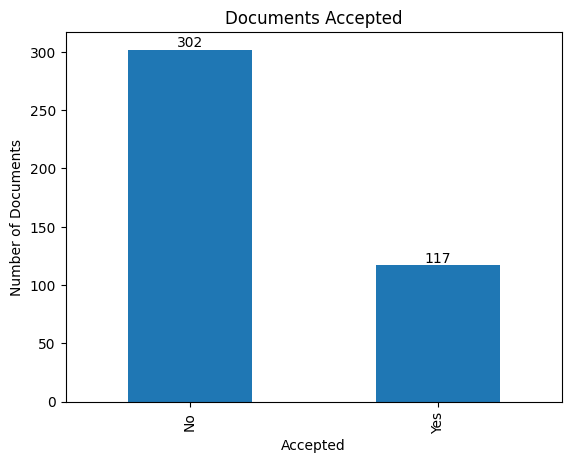

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each value
value_counts = docs_final.Accepted.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Accepted')
plt.ylabel('Number of Documents')
plt.title('Documents Accepted')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Accepted')
# Display the plot
plt.show()

In [ ]:
# Take the docs with Accepted = Yes
docs_final = docs_final[docs_final['Accepted'] == 'Yes']

In [ ]:
docs_index = [int(doc_index) for doc_index in docs_final.index.to_list()]
print(f'The number of accepted is {len(docs_index)}')

The number of accepted is 117


In [ ]:
# Get pdfs
pdfs = [int(pdf.split('.')[0]) for pdf in os.listdir('PDF')]
print(f'The number of pdfs is {len(pdfs)}')

The number of pdfs is 117


In [ ]:
def check_pdfs(list1, list2, name1, name2):
  dois_in1_not_in2 = list(set(list1) - set(list2))

  dois_in2_not_in1 = list(set(list2) - set(list1))

  if (len(dois_in1_not_in2) == 0) and (len(dois_in2_not_in1) == 0):
    print('Both files have the same pdfs!')
  else:
    if (len(dois_in1_not_in2) != 0):
      print(f'{name1} has {dois_in1_not_in2} pdfs that are not in {name2}')
    if (len(dois_in2_not_in1) != 0):
      print(f'{name2} has {dois_in2_not_in1} pdfs that are not in {name1}')
  return dois_in1_not_in2, dois_in2_not_in1

In [ ]:
_, _ = check_pdfs(docs_index, pdfs, name1='Google Sheet', name2='PDF')

Both files have the same pdfs!


### Filter Columns

In [ ]:
print(f'Initial Columns: {len(docs_final.columns)}')

cols_to_keep = ['Comments', 'Abstract', 'Title', 'Authors', 'Year',
                'Source title', 'Cited by', 'DOI', 'Link', 'Affiliations',
                'Author Keywords', 'Index Keywords', 'bothKeywords',
                'Document Type', 'Source', 'country']

docs_final = docs_final[cols_to_keep]
print(f'Initial Columns: {len(docs_final.columns)}')

Initial Columns: 44
Initial Columns: 16


In [ ]:
docs_final.Source = docs_final.Source.apply(lambda x: 'Pubmed' if x == '' else x)

# Plot Source

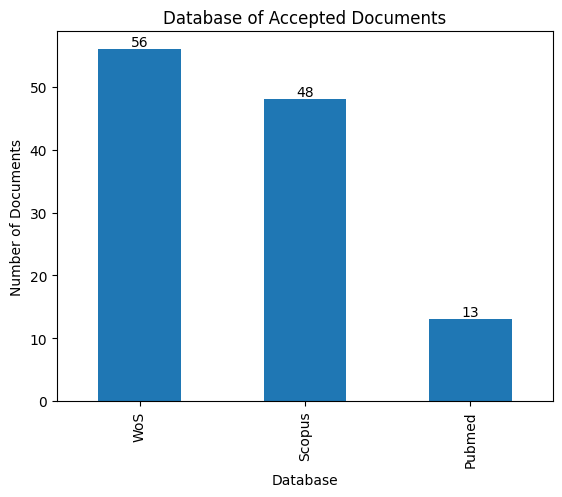

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each value
value_counts = docs_final.Source.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Database')
plt.ylabel('Number of Documents')
plt.title('Database of Accepted Documents')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Per DB')
# Display the plot
plt.show()

In [ ]:
docs_final = docs_final.reset_index()

In [ ]:
import csv
docs_final.to_csv('docs_final.csv', sep='\t', index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [ ]:
docs_final

,Index,Comments,Abstract,Title,Authors,Year,Source title,Cited by,DOI,Link,Affiliations,Author Keywords,Index Keywords,bothKeywords,Document Type,Source,country
0,11,Data analysis of breast cancer and mammography...,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,1,10.7189/jogh.12.04061,https://www.scopus.com/inward/record.uri?eid=2...,CEPAM – Centro de Pesquisa Avançada em Medicin...,,adult; aged; Brazil; breast tumor; cross-secti...,adult;aged;Brazil;breast tumor;cross-sectional...,Article,Scopus,Brazil
1,14,Analysis of transplants in Argentina. Using op...,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,0,10.1016/j.transproceed.2017.12.049,https://www.scopus.com/inward/record.uri?eid=2...,"Liver Transplant Unit, Hospital El Cruce, Flor...",,adult; Argentina; Article; child; comparative ...,adult;Argentina;Article;child;comparative stud...,Article,Scopus,Argentina
2,16,Predictive autoregressive model of covid: Data...,Different countries have adopted various contr...,Adaptive Multi-Factor Quantitative Analysis an...,"Pei Y., Li J., Xu S., Xu Y.",2022,Frontiers in Medicine,1,10.3389/fmed.2022.828691,https://www.scopus.com/inward/record.uri?eid=2...,"Clinical Data Center, Guangzhou Women and Chil...",adaptive multi-factor model; COVID-19; social ...,SARS-CoV-2 vaccine; Article; Brazil; coronavir...,adaptive multi-factor model;COVID-19;social is...,Article,Scopus,China
3,18,Covid forecast: Dataset: Open covid-19 data se...,The current spreading of the SARS-CoV-2 pandem...,A Deep Learning Approach to Forecast SARS-CoV-...,"Aguilar, I.L., Ibanez-Reluz, M., Aguilar, J.C....",2021,"COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",0,10.1007/978-3-030-86970-0_22,,"[Luis Aguilar, I] Natl Univ Piura, Dept Math, ...",Deep learning; SARS-CoV-2; Temporal convolutio...,,Deep learning;SARS-CoV-2;Temporal convolutiona...,Proceedings Paper,WoS,Peru;Brazil
4,20,Predictive autoregressive model of covid: They...,Here we present a discrete-time-evolution mode...,A discrete-time-evolution model to forecast pr...,"Curado E.M.F., Curado M.R.",2020,PLoS ONE,3,10.1371/journal.pone.0241472,https://www.scopus.com/inward/record.uri?eid=2...,"Centro Brasileiro de Pesquisas Físicas, Rio de...",,Article; asymptomatic infection; Brazil; case ...,Article;asymptomatic infection;Brazil;case stu...,Article,Scopus,Brazil;Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,374,Publicly available genomic dataset,Objectives: High-throughput sequencing of geno...,SELAdb: A database of exonic variants in a Bra...,"Lerario AM, Mohan DR, Montenegro LR, Funari MF...",2020,Clinics (Sao Paulo),,10.6061/clinics/2020/e1913,,,,,,,Pubmed,
113,376,We also analysed publicly available RNA-seq da...,MicroRNAs (miRNAs) play an essential role in g...,A genetic variant in microRNA-146a is associat...,"Brincas HM, Augusto DG, Mathias C, Cavalli IJ,...",2020,Genet Mol Biol,,10.1590/1678-4685-GMB-2019-0278,,,,,,,Pubmed,
114,391,Dataset for Diabetic Nephropathy in Brazil - d...,This article describes data set of the profile...,Clinical data and risk factors for diabetic ne...,"da Silva EG, Borges Dos Anjos LR, Mendes de Li...",2018,Data Brief,,10.1016/j.dib.2018.10.115,,,,,,,Pubmed,
115,406,cross-sectional analysis of publicly available...,Objective: To determine the association betwee...,Inverse association between altitude and obesi...,"Woolcott OO, Gutierrez C, Castillo OA, Elashof...",2016,Obesity (Silver Spring),,10.1002/oby.21401,,,,,,,Pubmed,
